In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/test_scaling_all/P12/plots/model'



In [38]:
pred = pd.read_csv(f'{directory}/qoi_pred_fw.csv')
test = pd.read_csv(f'{directory}/qoi_test.csv')

In [39]:
state_keys = pred.columns
state_keys = state_keys.drop(['Unnamed: 0'])
state_keys

Index(['P12_0.450_5', 'P12_0.450_6', 'P12_0.450_7', 'P12_0.450_8',
       'P12_0.450_9', 'P12_0.450_10', 'P12_0.450_11', 'P12_0.450_12',
       'P12_0.450_13', 'P12_0.450_14',
       ...
       'P12_0.630_166', 'P12_0.630_167', 'P12_0.630_168', 'P12_0.630_169',
       'P12_0.630_170', 'P12_0.630_171', 'P12_0.630_172', 'P12_0.630_173',
       'P12_0.630_174', 'P12_0.630_175'],
      dtype='object', length=513)

In [40]:
test = test[state_keys]
pred = pred[state_keys]

In [41]:
test

P12_0.450_5  P12_0.450_6  P12_0.450_7  P12_0.450_8  P12_0.450_9  \
0         0.010494     0.016552     0.025117     0.036304     0.049697   
1        -0.000095    -0.000143    -0.000203    -0.000278    -0.000371   
2         0.001290     0.001877     0.002615     0.003550     0.004753   
3         0.014549     0.023580     0.035881     0.050331     0.066371   
4        -0.001015     0.002002     0.008150     0.016933     0.026678   
...            ...          ...          ...          ...          ...   
19995    -0.000968     0.001670     0.007385     0.016219     0.026936   
19996     0.002067     0.004276     0.008381     0.015214     0.025194   
19997     0.007187     0.013559     0.023649     0.036962     0.052377   
19998    -0.001554    -0.000027     0.003845     0.010384     0.018896   
19999    -0.000258    -0.000314    -0.000322    -0.000238    -0.000003   

       P12_0.450_10  P12_0.450_11  P12_0.450_12  P12_0.450_13  P12_0.450_14  \
0          0.063564      0.078355      0.093138      0.109750      0.122160   
1         -0.000484     -0.000621     -0.000785     -0.000985     -0.001207   
2          0.006325      0.008406      0.011166      0.015025      0.019596   
3          0.081773      0.098334      0.115960      0.134930      0.151240   
4          0.035311      0.042476      0.048028      0.051648      0.054577   
...             ...           ...           ...           ...           ...   
19995      0.037337      0.046794      0.054829      0.060881      0.066141   
19996      0.037593      0.051754      0.066033      0.081053      0.092916   
19997      0.067405      0.083144      0.099329      0.116610      0.131260   
19998      0.027776      0.036044      0.042949      0.048882      0.053095   
19999      0.000461      0.001255      0.002503      0.004379      0.006965   

       ...  P12_0.630_166  P12_0.630_167  P12_0.630_168  P12_0.630_169  \
0      ...      -0.069003      -0.067744      -0.070968      -0.079575   
1      ...      -0.193970      -0.178450      -0.161200      -0.142690   
2      ...      -0.371960      -0.368730      -0.357110      -0.335040   
3      ...       0.010730       0.009403       0.008195       0.007163   
4      ...       0.391720       0.350720       0.299280       0.233470   
...    ...            ...            ...            ...            ...   
19995  ...       0.303090       0.283310       0.253220       0.208900   
19996  ...      -0.164220      -0.162960      -0.158950      -0.151910   
19997  ...      -0.039297      -0.043306      -0.052508      -0.065651   
19998  ...       0.109020       0.055556       0.013781      -0.017683   
19999  ...      -0.588340      -0.560020      -0.516720      -0.460010   

       P12_0.630_170  P12_0.630_171  P12_0.630_172  P12_0.630_173  \
0          -0.093038      -0.109230      -0.124310      -0.132950   
1          -0.123450      -0.104040      -0.085033      -0.066970   
2          -0.301510      -0.257660      -0.207320      -0.156160   
3           0.006358       0.005788       0.005394       0.005054   
4           0.162200       0.096652       0.040517      -0.002884   
...              ...            ...            ...            ...   
19995       0.155890       0.102350       0.052610       0.010814   
19996      -0.141360      -0.126750      -0.107810      -0.085342   
19997      -0.080371      -0.093692      -0.102430      -0.103690   
19998      -0.040172      -0.055046      -0.060138      -0.051447   
19999      -0.393890      -0.323870      -0.255500      -0.193000   

       P12_0.630_174  P12_0.630_175  
0          -0.129420      -0.110710  
1          -0.050355      -0.035623  
2          -0.109720      -0.071521  
3           0.004618       0.003966  
4          -0.032545      -0.045161  
...              ...            ...  
19995      -0.020238      -0.036216  
19996      -0.061679      -0.040067  
19997      -0.095670      -0.078860  
19998      -0.024780       0.020325  
19999      -0.138890      -0.0941

In [7]:
rel_error_fw_old = (test - pred) / test * 100.
rel_error_fw_old

P12_0.450_5  P12_0.450_6  P12_0.450_7  P12_0.450_8   P12_0.450_9  \
0         0.227020     2.415425     1.692922     0.961113      0.212838   
1      -108.617099    -5.131099    13.729460    47.712664     52.508296   
2        -4.558662    -0.430377     7.447570    -0.724184     -5.808266   
3         4.826110     3.490720     2.508020     5.406001      3.293780   
4       -14.545188    15.809662    10.005019     6.673611      7.307727   
...            ...          ...          ...          ...           ...   
19995    -7.408831    -0.423415     3.760900     5.485437      6.817259   
19996    19.569341     8.637045     5.557245    -2.648485      2.885086   
19997    -3.428630     0.010564     0.906818    -0.807158      1.784219   
19998    11.996085   464.334313    -5.822916    -2.662439      4.191823   
19999    63.427711   -74.496868   -61.365362  -139.202993 -17606.880080   

       P12_0.450_10  P12_0.450_11  P12_0.450_12  P12_0.450_13  P12_0.450_14  \
0          1.978549      1.975847     -0.114829     -0.466540      0.407104   
1        116.668941    -40.448046     41.757602    -81.228083   -192.623486   
2         13.163068     10.504329     19.001422     17.979920      2.938461   
3          1.114873      1.085385      0.982737      2.573191      4.073499   
4          5.632194      2.027043      0.442402      3.664045     -3.112228   
...             ...           ...           ...           ...           ...   
19995      0.062611     -3.943741     -1.305052     -0.905304     -2.440336   
19996      4.864022      4.090225      3.899644      4.108450      1.052523   
19997      0.588020      0.085044     -1.248176     -2.322821      0.309100   
19998      3.345324      1.828446     -2.427409     -6.868468     -2.008617   
19999     82.525160    111.941665     80.183885     45.278866     50.358915   

       ...  P12_0.630_166  P12_0.630_167  P12_0.630_168  P12_0.630_169  \
0      ...      -0.930011     -26.037654      -8.471389     -11.415589   
1      ...       4.975061       7.290027       2.123036       4.909125   
2      ...       0.703127      -0.132291       1.172555      -4.729400   
3      ...    -200.076622     168.004838      11.418543     -64.246108   
4      ...      -2.875765       2.117928      -5.154862      -6.567026   
...    ...            ...            ...            ...            ...   
19995  ...      -1.232367       3.373817      -2.231049      -3.400238   
19996  ...       1.205113     -10.653002       0.358762      -1.858255   
19997  ...      -4.759188     -42.443474       0.830137       5.787553   
19998  ...      -1.861548      22.143725      52.313961     -61.050618   
19999  ...      -0.369495       0.587859       1.732985      -0.618950   

       P12_0.630_170  P12_0.630_171  P12_0.630_172  P12_0.630_173  \
0          -9.207706     -12.446036      -7.489565      -6.777440   
1           2.272196       5.525847       6.904890       6.184861   
2           0.006357      -3.172150      -4.357755      -8.973778   
3          86.352075      37.892687      87.086051     112.950339   
4          -1.030048     -22.378936     -58.227885     510.157990   
...              ...            ...            ...            ...   
19995       0.327682      -4.543864       1.041136      15.192927   
19996       1.906053       7.981294      10.683677      13.665907   
19997      -4.717318       8.628073       1.697209      -1.810052   
19998     -29.858657     -32.823958     -37.801670     -48.299333   
19999       0.278808       2.802924       1.765138       2.960333   

       P12_0.630_174  P12_0.630_175  
0          -7.742307      -4.664116  
1           9.886419      17.334376  
2          -4.932133      -3.433550  
3        -139.678545    -202.289399  
4           4.582694      23.820039  
...              ...            ...  
19995       1.408673       5.449935  
19996      23.234085      33.373227  
19997       9.334939       2.963738  
19998     -61.925050      54.018707  
19999       1.233629 

In [8]:
rel_error_fw = ((1+test) - (1+pred)) / (1+test) * 100.
rel_error_fw

P12_0.450_5  P12_0.450_6  P12_0.450_7  P12_0.450_8  P12_0.450_9  \
0         0.002358     0.039329     0.041479     0.033670     0.010077   
1         0.010350     0.000732    -0.002787    -0.013281    -0.019497   
2        -0.005871    -0.000806     0.019427    -0.002562    -0.027474   
3         0.069208     0.080415     0.086873     0.259051     0.205005   
4         0.014781     0.031586     0.080887     0.111123     0.189890   
...            ...          ...          ...          ...          ...   
19995     0.007178    -0.000706     0.027570     0.087548     0.178813   
19996     0.040368     0.036774     0.046190    -0.039690     0.070901   
19997    -0.024466     0.000141     0.020950    -0.028771     0.088801   
19998    -0.018675    -0.012696    -0.022306    -0.027363     0.077740   
19999    -0.016344     0.023401     0.019750     0.033101     0.051477   

       P12_0.450_10  P12_0.450_11  P12_0.450_12  P12_0.450_13  P12_0.450_14  \
0          0.118248      0.143568     -0.009784     -0.046139      0.044318   
1         -0.056541      0.025136     -0.032788      0.080065      0.232816   
2          0.082733      0.087559      0.209827      0.266149      0.056475   
3          0.084275      0.097175      0.102117      0.305923      0.535141   
4          0.192095      0.082592      0.020274      0.179947     -0.161066   
...             ...           ...           ...           ...           ...   
19995      0.002254     -0.176294     -0.067835     -0.051953     -0.151393   
19996      0.176228      0.201269      0.241555      0.308035      0.089482   
19997      0.037133      0.006528     -0.112778     -0.242577      0.035865   
19998      0.090409      0.063612     -0.099962     -0.320097     -0.101271   
19999      0.038036      0.140311      0.200183      0.197425      0.348339   

       ...  P12_0.630_166  P12_0.630_167  P12_0.630_168  P12_0.630_169  \
0      ...       0.068930       1.892071       0.647122       0.986930   
1      ...      -1.197242      -1.583477      -0.408004      -0.817071   
2      ...      -0.416431       0.077272      -0.651326       2.382907   
3      ...      -2.124031       1.565017       0.092817      -0.456916   
4      ...      -0.809426       0.549929      -1.187386      -1.243000   
...    ...            ...            ...            ...            ...   
19995  ...      -0.286640       0.744821      -0.450796      -0.587567   
19996  ...      -0.236789       2.073991      -0.067802       0.332851   
19997  ...       0.194672       1.921259      -0.046004      -0.406656   
19998  ...      -0.182996       1.165468       0.711138       1.098992   
19999  ...       0.528078      -0.748245      -1.852897       0.527275   

       P12_0.630_170  P12_0.630_171  P12_0.630_172  P12_0.630_173  \
0           0.944545       1.526186       1.063193       1.039226   
1          -0.320007      -0.641668      -0.641710      -0.443930   
2          -0.002744       1.101027       1.139741       1.660676   
3           0.545541       0.218057       0.467231       0.567992   
4          -0.143756      -1.972338      -2.267353      -1.475808   
...              ...            ...            ...            ...   
19995       0.044193      -0.421885       0.052037       0.162539   
19996      -0.313798      -1.158464      -1.290989      -1.275095   
19997       0.412270      -0.891950      -0.193684       0.209397   
19998       1.249684       1.912080       2.418777       2.619628   
19999      -0.181188      -1.342616      -0.605766      -0.707985   

       P12_0.630_174  P12_0.630_175  
0           1.150968       0.580648  
1          -0.524228      -0.640312  
2           0.607847       0.264487  
3          -0.642015      -0.799030  
4          -0.154161      -1.126616  
...              ...            ...  
19995      -0.029098      -0.204792  
19996      -1.527255      -1.392978  
19997      -0.987553      -0.253730  
19998       1.573494       1.076059  
19999      -0.198974      -0.3949

In [9]:
rel_error_table_fw = np.round(rel_error_fw.quantile([0.5, 0.75, 0.9, 0.95, 0.99]).rename(index={
    0.5: '50%',
    0.75: '75%',
    0.9: '90%',
    0.95: '95%',
    0.99: '99%',
}), decimals=2)
rel_error_table_fw

P12_0.450_5  P12_0.450_6  P12_0.450_7  P12_0.450_8  P12_0.450_9  \
50%         0.01         0.02         0.03         0.03         0.04   
75%         0.02         0.04         0.06         0.07         0.09   
90%         0.04         0.07         0.09         0.11         0.14   
95%         0.05         0.08         0.10         0.15         0.17   
99%         0.07         0.11         0.14         0.24         0.23   

     P12_0.450_10  P12_0.450_11  P12_0.450_12  P12_0.450_13  P12_0.450_14  \
50%          0.07          0.09          0.06          0.11          0.12   
75%          0.12          0.16          0.15          0.23          0.25   
90%          0.18          0.23          0.22          0.33          0.37   
95%          0.21          0.27          0.26          0.39          0.44   
99%          0.29          0.36          0.37          0.50          0.61   

     ...  P12_0.630_166  P12_0.630_167  P12_0.630_168  P12_0.630_169  \
50%  ...          -0.15           0.65          -0.01           0.13   
75%  ...           0.87           1.60           0.83           1.10   
90%  ...           2.03           2.44           1.72           2.28   
95%  ...           2.85           3.07           2.35           3.06   
99%  ...           4.52           4.44           3.65           4.65   

     P12_0.630_170  P12_0.630_171  P12_0.630_172  P12_0.630_173  \
50%           0.09          -0.01           0.01           0.14   
75%           0.97           0.76           0.71           0.79   
90%           1.93           1.62           1.41           1.50   
95%           2.58           2.22           1.88           1.94   
99%           3.74           3.25           2.96           2.85   

     P12_0.630_174  P12_0.630_175  
50%          -0.01          -0.08  
75%           0.45           0.33  
90%           0.93           0.76  
95%           1.30           1.07  
99%           2.02           1.75  

[5 rows x 513 columns]

In [10]:
print(rel_error_table_fw.max(axis = 1))


50%    1.33
75%    2.35
90%    3.46
95%    4.40
99%    7.46
dtype: float64


In [11]:
diff = test - pred
diff

P12_0.450_5  P12_0.450_6  P12_0.450_7  P12_0.450_8  P12_0.450_9  \
0         0.000024     0.000400     0.000425     0.000349     0.000106   
1         0.000103     0.000007    -0.000028    -0.000133    -0.000195   
2        -0.000059    -0.000008     0.000195    -0.000026    -0.000276   
3         0.000702     0.000823     0.000900     0.002721     0.002186   
4         0.000148     0.000316     0.000815     0.001130     0.001950   
...            ...          ...          ...          ...          ...   
19995     0.000072    -0.000007     0.000278     0.000890     0.001836   
19996     0.000405     0.000369     0.000466    -0.000403     0.000727   
19997    -0.000246     0.000001     0.000214    -0.000298     0.000935   
19998    -0.000186    -0.000127    -0.000224    -0.000276     0.000792   
19999    -0.000163     0.000234     0.000197     0.000331     0.000515   

       P12_0.450_10  P12_0.450_11  P12_0.450_12  P12_0.450_13  P12_0.450_14  \
0          0.001258      0.001548     -0.000107     -0.000512      0.000497   
1         -0.000565      0.000251     -0.000328      0.000800      0.002325   
2          0.000833      0.000883      0.002122      0.002701      0.000576   
3          0.000912      0.001067      0.001140      0.003472      0.006161   
4          0.001989      0.000861      0.000212      0.001892     -0.001699   
...             ...           ...           ...           ...           ...   
19995      0.000023     -0.001845     -0.000716     -0.000551     -0.001614   
19996      0.001829      0.002117      0.002575      0.003330      0.000978   
19997      0.000396      0.000071     -0.001240     -0.002709      0.000406   
19998      0.000929      0.000659     -0.001043     -0.003357     -0.001066   
19999      0.000381      0.001405      0.002007      0.001983      0.003508   

       ...  P12_0.630_166  P12_0.630_167  P12_0.630_168  P12_0.630_169  \
0      ...       0.000642       0.017639       0.006012       0.009084   
1      ...      -0.009650      -0.013009      -0.003422      -0.007005   
2      ...      -0.002615       0.000488      -0.004187       0.015845   
3      ...      -0.021468       0.015797       0.000936      -0.004602   
4      ...      -0.011265       0.007428      -0.015427      -0.015332   
...    ...            ...            ...            ...            ...   
19995  ...      -0.003735       0.009558      -0.005649      -0.007103   
19996  ...      -0.001979       0.017360      -0.000570       0.002823   
19997  ...       0.001870       0.018381      -0.000436      -0.003800   
19998  ...      -0.002029       0.012302       0.007209       0.010796   
19999  ...       0.002174      -0.003292      -0.008955       0.002847   

       P12_0.630_170  P12_0.630_171  P12_0.630_172  P12_0.630_173  \
0           0.008567       0.013595       0.009310       0.009011   
1          -0.002805      -0.005749      -0.005871      -0.004142   
2          -0.000019       0.008173       0.009034       0.014013   
3           0.005490       0.002193       0.004698       0.005709   
4          -0.001671      -0.021630      -0.023592      -0.014716   
...              ...            ...            ...            ...   
19995       0.000511      -0.004651       0.000548       0.001643   
19996      -0.002694      -0.010116      -0.011518      -0.011663   
19997       0.003791      -0.008084      -0.001738       0.001877   
19998       0.011995       0.018068       0.022733       0.024849   
19999      -0.001098      -0.009078      -0.004510      -0.005713   

       P12_0.630_174  P12_0.630_175  
0           0.010020       0.005164  
1          -0.004978      -0.006175  
2           0.005412       0.002456  
3          -0.006450      -0.008022  
4          -0.001491      -0.010757  
...              ...            ...  
19995      -0.000285      -0.001974  
19996      -0.014331      -0.013372  
19997      -0.008931      -0.002337  
19998       0.015345       0.010979  
19999      -0.001713      -0.0035

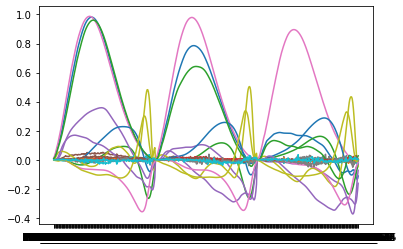

In [12]:
for i in range(10):
    plt.plot(test.iloc[i])
    plt.plot(diff.iloc[i])

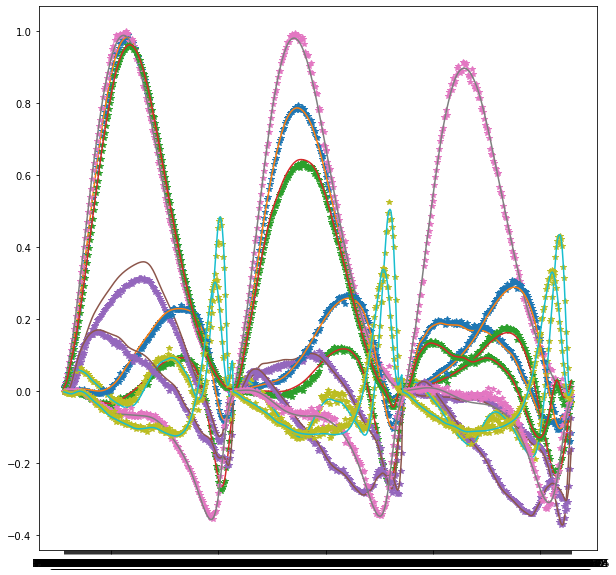

In [13]:
fig = plt.subplots(figsize = (10,10))

for i in range(10):
    plt.plot(pred.iloc[i],'*')
    plt.plot(test.iloc[i])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [15]:
MAE = mean_absolute_error(test,pred)

In [16]:
MAE

0.007924397113949613

In [20]:
np.mean(test.mean())

0.11079960765646657

In [22]:
np.mean(test.std())

0.20922260503561646

In [23]:
MSE = mean_squared_error(test,pred)

In [24]:
MSE

0.00012776729532236607

In [25]:
explained_variance_score(test,pred)

0.9977370080492629

In [26]:
rel_error1 = (test-pred)/test

In [28]:
error1 = test-pred
error1

P12_0.450_5  P12_0.450_6  P12_0.450_7  P12_0.450_8  P12_0.450_9  \
0         0.000024     0.000400     0.000425     0.000349     0.000106   
1         0.000103     0.000007    -0.000028    -0.000133    -0.000195   
2        -0.000059    -0.000008     0.000195    -0.000026    -0.000276   
3         0.000702     0.000823     0.000900     0.002721     0.002186   
4         0.000148     0.000316     0.000815     0.001130     0.001950   
...            ...          ...          ...          ...          ...   
19995     0.000072    -0.000007     0.000278     0.000890     0.001836   
19996     0.000405     0.000369     0.000466    -0.000403     0.000727   
19997    -0.000246     0.000001     0.000214    -0.000298     0.000935   
19998    -0.000186    -0.000127    -0.000224    -0.000276     0.000792   
19999    -0.000163     0.000234     0.000197     0.000331     0.000515   

       P12_0.450_10  P12_0.450_11  P12_0.450_12  P12_0.450_13  P12_0.450_14  \
0          0.001258      0.001548     -0.000107     -0.000512      0.000497   
1         -0.000565      0.000251     -0.000328      0.000800      0.002325   
2          0.000833      0.000883      0.002122      0.002701      0.000576   
3          0.000912      0.001067      0.001140      0.003472      0.006161   
4          0.001989      0.000861      0.000212      0.001892     -0.001699   
...             ...           ...           ...           ...           ...   
19995      0.000023     -0.001845     -0.000716     -0.000551     -0.001614   
19996      0.001829      0.002117      0.002575      0.003330      0.000978   
19997      0.000396      0.000071     -0.001240     -0.002709      0.000406   
19998      0.000929      0.000659     -0.001043     -0.003357     -0.001066   
19999      0.000381      0.001405      0.002007      0.001983      0.003508   

       ...  P12_0.630_166  P12_0.630_167  P12_0.630_168  P12_0.630_169  \
0      ...       0.000642       0.017639       0.006012       0.009084   
1      ...      -0.009650      -0.013009      -0.003422      -0.007005   
2      ...      -0.002615       0.000488      -0.004187       0.015845   
3      ...      -0.021468       0.015797       0.000936      -0.004602   
4      ...      -0.011265       0.007428      -0.015427      -0.015332   
...    ...            ...            ...            ...            ...   
19995  ...      -0.003735       0.009558      -0.005649      -0.007103   
19996  ...      -0.001979       0.017360      -0.000570       0.002823   
19997  ...       0.001870       0.018381      -0.000436      -0.003800   
19998  ...      -0.002029       0.012302       0.007209       0.010796   
19999  ...       0.002174      -0.003292      -0.008955       0.002847   

       P12_0.630_170  P12_0.630_171  P12_0.630_172  P12_0.630_173  \
0           0.008567       0.013595       0.009310       0.009011   
1          -0.002805      -0.005749      -0.005871      -0.004142   
2          -0.000019       0.008173       0.009034       0.014013   
3           0.005490       0.002193       0.004698       0.005709   
4          -0.001671      -0.021630      -0.023592      -0.014716   
...              ...            ...            ...            ...   
19995       0.000511      -0.004651       0.000548       0.001643   
19996      -0.002694      -0.010116      -0.011518      -0.011663   
19997       0.003791      -0.008084      -0.001738       0.001877   
19998       0.011995       0.018068       0.022733       0.024849   
19999      -0.001098      -0.009078      -0.004510      -0.005713   

       P12_0.630_174  P12_0.630_175  
0           0.010020       0.005164  
1          -0.004978      -0.006175  
2           0.005412       0.002456  
3          -0.006450      -0.008022  
4          -0.001491      -0.010757  
...              ...            ...  
19995      -0.000285      -0.001974  
19996      -0.014331      -0.013372  
19997      -0.008931      -0.002337  
19998       0.015345       0.010979  
19999      -0.001713      -0.0035

In [32]:
rel_error2 = 1-pred/test

In [33]:
rel_error2

P12_0.450_5  P12_0.450_6  P12_0.450_7  P12_0.450_8  P12_0.450_9  \
0         0.002270     0.024154     0.016929     0.009611     0.002128   
1        -1.086171    -0.051311     0.137295     0.477127     0.525083   
2        -0.045587    -0.004304     0.074476    -0.007242    -0.058083   
3         0.048261     0.034907     0.025080     0.054060     0.032938   
4        -0.145452     0.158097     0.100050     0.066736     0.073077   
...            ...          ...          ...          ...          ...   
19995    -0.074088    -0.004234     0.037609     0.054854     0.068173   
19996     0.195693     0.086370     0.055572    -0.026485     0.028851   
19997    -0.034286     0.000106     0.009068    -0.008072     0.017842   
19998     0.119961     4.643343    -0.058229    -0.026624     0.041918   
19999     0.634277    -0.744969    -0.613654    -1.392030  -176.068801   

       P12_0.450_10  P12_0.450_11  P12_0.450_12  P12_0.450_13  P12_0.450_14  \
0          0.019785      0.019758     -0.001148     -0.004665      0.004071   
1          1.166689     -0.404480      0.417576     -0.812281     -1.926235   
2          0.131631      0.105043      0.190014      0.179799      0.029385   
3          0.011149      0.010854      0.009827      0.025732      0.040735   
4          0.056322      0.020270      0.004424      0.036640     -0.031122   
...             ...           ...           ...           ...           ...   
19995      0.000626     -0.039437     -0.013051     -0.009053     -0.024403   
19996      0.048640      0.040902      0.038996      0.041085      0.010525   
19997      0.005880      0.000850     -0.012482     -0.023228      0.003091   
19998      0.033453      0.018284     -0.024274     -0.068685     -0.020086   
19999      0.825252      1.119417      0.801839      0.452789      0.503589   

       ...  P12_0.630_166  P12_0.630_167  P12_0.630_168  P12_0.630_169  \
0      ...      -0.009300      -0.260377      -0.084714      -0.114156   
1      ...       0.049751       0.072900       0.021230       0.049091   
2      ...       0.007031      -0.001323       0.011726      -0.047294   
3      ...      -2.000766       1.680048       0.114185      -0.642461   
4      ...      -0.028758       0.021179      -0.051549      -0.065670   
...    ...            ...            ...            ...            ...   
19995  ...      -0.012324       0.033738      -0.022310      -0.034002   
19996  ...       0.012051      -0.106530       0.003588      -0.018583   
19997  ...      -0.047592      -0.424435       0.008301       0.057876   
19998  ...      -0.018615       0.221437       0.523140      -0.610506   
19999  ...      -0.003695       0.005879       0.017330      -0.006189   

       P12_0.630_170  P12_0.630_171  P12_0.630_172  P12_0.630_173  \
0          -0.092077      -0.124460      -0.074896      -0.067774   
1           0.022722       0.055258       0.069049       0.061849   
2           0.000064      -0.031722      -0.043578      -0.089738   
3           0.863521       0.378927       0.870861       1.129503   
4          -0.010300      -0.223789      -0.582279       5.101580   
...              ...            ...            ...            ...   
19995       0.003277      -0.045439       0.010411       0.151929   
19996       0.019061       0.079813       0.106837       0.136659   
19997      -0.047173       0.086281       0.016972      -0.018101   
19998      -0.298587      -0.328240      -0.378017      -0.482993   
19999       0.002788       0.028029       0.017651       0.029603   

       P12_0.630_174  P12_0.630_175  
0          -0.077423      -0.046641  
1           0.098864       0.173344  
2          -0.049321      -0.034335  
3          -1.396785      -2.022894  
4           0.045827       0.238200  
...              ...            ...  
19995       0.014087       0.054499  
19996       0.232341       0.333732  
19997       0.093349       0.029637  
19998      -0.619251       0.540187  
19999       0.012336       0.0379

Options:
- MAE Mean absolute error
- MSE
    

In [49]:
MAE = 1/len(test)*(np.sum(np.abs(test-pred), axis =1 ))
print(MAE)
print('mean of MAE: ',np.mean(MAE))
print('min of MAE: ', np.min(MAE))
print('max of MAE: ', np.max(MAE))

0        0.000094
1        0.000152
2        0.000359
3        0.000172
4        0.000224
           ...   
19995    0.000152
19996    0.000231
19997    0.000149
19998    0.000211
19999    0.000340
Length: 20000, dtype: float64
mean of MAE:  0.00020326078597280765
min of MAE:  5.9473755861281414e-05
max of MAE:  0.0011892027270155934


In [51]:
MSE = 1/len(test)*(np.sum((test-pred)**2.0, axis =1 ))
print(MSE)
print('mean of MSE: ',np.mean(MSE))
print('min of MSE: ', np.min(MSE))
print('max of MSE: ', np.max(MSE))

0        6.944489e-07
1        1.499200e-06
2        9.679353e-06
3        2.337093e-06
4        3.400343e-06
             ...     
19995    1.806472e-06
19996    3.641478e-06
19997    1.646498e-06
19998    3.066103e-06
19999    8.042779e-06
Length: 20000, dtype: float64
mean of MSE:  3.2772311250186897e-06
min of MSE:  2.601455648915136e-07
max of MSE:  9.085024628808319e-05


In [52]:
RMSE = np.sqrt(MSE)
print(RMSE)
print('mean of MSE: ',np.mean(RMSE))
print('min of MSE: ', np.min(RMSE))
print('max of MSE: ', np.max(RMSE))

0        0.000833
1        0.001224
2        0.003111
3        0.001529
4        0.001844
           ...   
19995    0.001344
19996    0.001908
19997    0.001283
19998    0.001751
19999    0.002836
Length: 20000, dtype: float64
mean of MSE:  0.0016914973485326356
min of MSE:  0.0005100446695060283
max of MSE:  0.009531539554976582


In [54]:
MAPE = 1/len(test)*(np.sum((np.abs(test-pred)/np.abs(test)), axis =1 ))
print(MAPE)
print('mean of MAPE: ',np.mean(MAPE))
print('min of MAPE: ', np.min(MAPE))
print('max of MAPE: ', np.max(MAPE))



0        0.001390
1        0.101091
2        0.006011
3        0.001730
4        0.008552
           ...   
19995    0.040879
19996    0.002396
19997    0.004194
19998    0.020732
19999    0.021118
Length: 20000, dtype: float64
mean of MAPE:  0.013493278984930652
min of MAPE:  0.0006812100052351919
max of MAPE:  5.426967404648039


In [55]:
sMAPE = 1/len(test)*(np.sum((2*np.abs(test-pred)/(np.abs(test)+np.abs(pred))), axis =1 ))
print(sMAPE)
print('mean of sMAPE: ',np.mean(sMAPE))
print('min of sMAPE: ', np.min(sMAPE))
print('max of sMAPE: ', np.max(sMAPE))

0        0.001206
1        0.010336
2        0.005496
3        0.001751
4        0.006381
           ...   
19995    0.005511
19996    0.002197
19997    0.001595
19998    0.006164
19999    0.007220
Length: 20000, dtype: float64
mean of sMAPE:  0.0038852042652588147
min of sMAPE:  0.0006864877056650818
max of sMAPE:  0.019756400852183772
